In [20]:
#Importando imagens
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests
import numpy as np


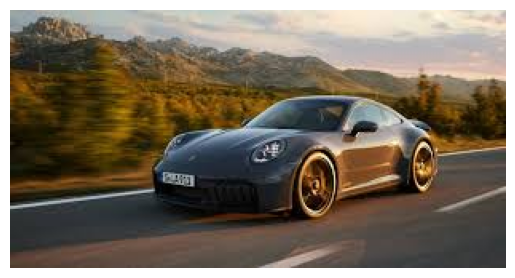

In [21]:
# URL da imagem
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6JQxCzss4NGgfRSZBPRIWkNlxFG1j5HoYZQ&s"

# Baixando a imagem da URL
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    try:
        # Abrindo a imagem original
        img = Image.open(BytesIO(response.content))

        # Usando matplotlib para exibir a imagem
        plt.imshow(img)
        plt.axis('off')  # Para não exibe os eixos
        plt.show()
    except Exception as e:
        print(f"Ocorreu um erro ao tentar abrir a imagem: {e}")
else:
    print(f"Falha ao baixar a imagem. Status code: {response.status_code}")


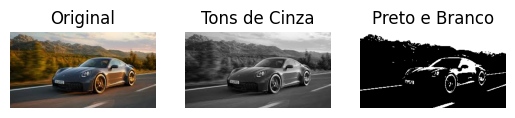

A imagem em preto e branco foi salva como 'imagem_em_preto_e_branco.jpg'.


In [26]:
#Aplicando conceitos matematicos para realizar a redução de dimencionalidade:


# Convertendo a imagem para um array NumPy (em formato RGB)
img_array = np.array(img)

# Convertendo para tons de cinza usando a fórmula de luminância
gray_array = 0.2989 * img_array[..., 0] + 0.5870 * img_array[..., 1] + 0.1140 * img_array[..., 2]

# Definindo o limiar para a conversão em preto e branco
threshold = 128  # Valor do limiar (0-255). Você pode experimentar com diferentes valores.

# Aplicando o limiar: se o valor for maior que o limiar, será branco (255), caso contrário, preto (0)
bw_array = np.where(gray_array > threshold, 255, 0).astype(np.uint8)

# Exibindo a imagem original, em tons de cinza e a imagem em preto e branco
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(gray_array, cmap='gray')
plt.axis('off')
plt.title('Tons de Cinza')

plt.subplot(1, 3, 3)
plt.imshow(bw_array, cmap='gray')
plt.axis('off')
plt.title('Preto e Branco')

plt.show()

# Salvando a imagem em preto e branco
bw_image = Image.fromarray(bw_array)  # Convertendo de volta para imagem
bw_image.save("imagem_em_preto_e_branco.jpg")
print("A imagem em preto e branco foi salva como 'imagem_em_preto_e_branco.jpg'.")